In [10]:
from neuron import h, rxd
from neuron.units import ms, mV, nM
import matplotlib.pyplot as plt

### Making the neuron and adding channels

In [2]:
soma = h.Section(name="soma")
soma.L = 20
soma.diam = 20
soma.insert("hh")


soma

In [3]:
iclamp = h.IClamp(soma(0.5))
iclamp.delay = 2
iclamp.dur = 10
iclamp.amp = 0.9

### Reaction diffusion stuff....

In [4]:
cyt = rxd.Region(soma.wholetree(), name="cyt", nrn_region="i")
ca = rxd.Species(cyt, name="ca", charge=2, atolscale=1e-6)
na = rxd.Species(cyt, name="na", charge=1)

cavec = h.Vector().record(ca.nodes[0]._ref_concentration)
navec = h.Vector().record(na.nodes[0]._ref_concentration)

### Simulating the neuron

In [5]:
v = h.Vector().record(soma(0.5)._ref_v)  # Membrane potential vector
t = h.Vector().record(h._ref_t)  # Time stamp vector

In [6]:
h.load_file("stdrun.hoc")
h.finitialize(-65 * mV)
h.continuerun(40 * ms)

0.0

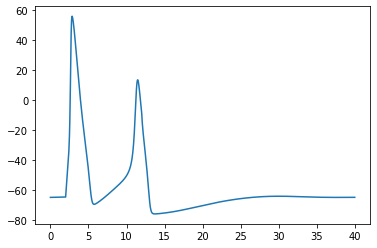

In [7]:
f = plt.figure()
plt.plot(t, v)

In [15]:
navec_array = (navec).as_numpy()

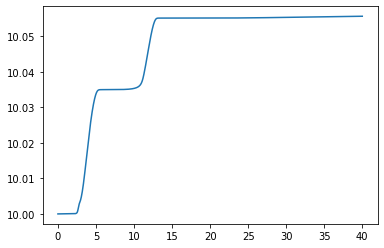

In [16]:
plt.plot(t, navec_array)

In [20]:
print(dir(na))

['_3doffset', '_3doffset_by_region', '__Pos__', '__abs__', '__add__', '__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__pow__', '__radd__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmul__', '__rsub__', '__rtruediv__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '_all_intracellular_nodes', '_allow_setting', '_assign_parents', '_atolscale', '_charge', '_d', '_do_init', '_do_init1', '_do_init2', '_do_init3', '_do_init4', '_do_init5', '_do_init6', '_ecs_boundary_conditions', '_evaluate', '_extracellular_instances', '_extracellular_nodes', '_extracellular_regions', '_finitialize', '_has_adjusted_offsets', '_has_region_section', '_id', '_import_concentration', '_indice